# 分类问题

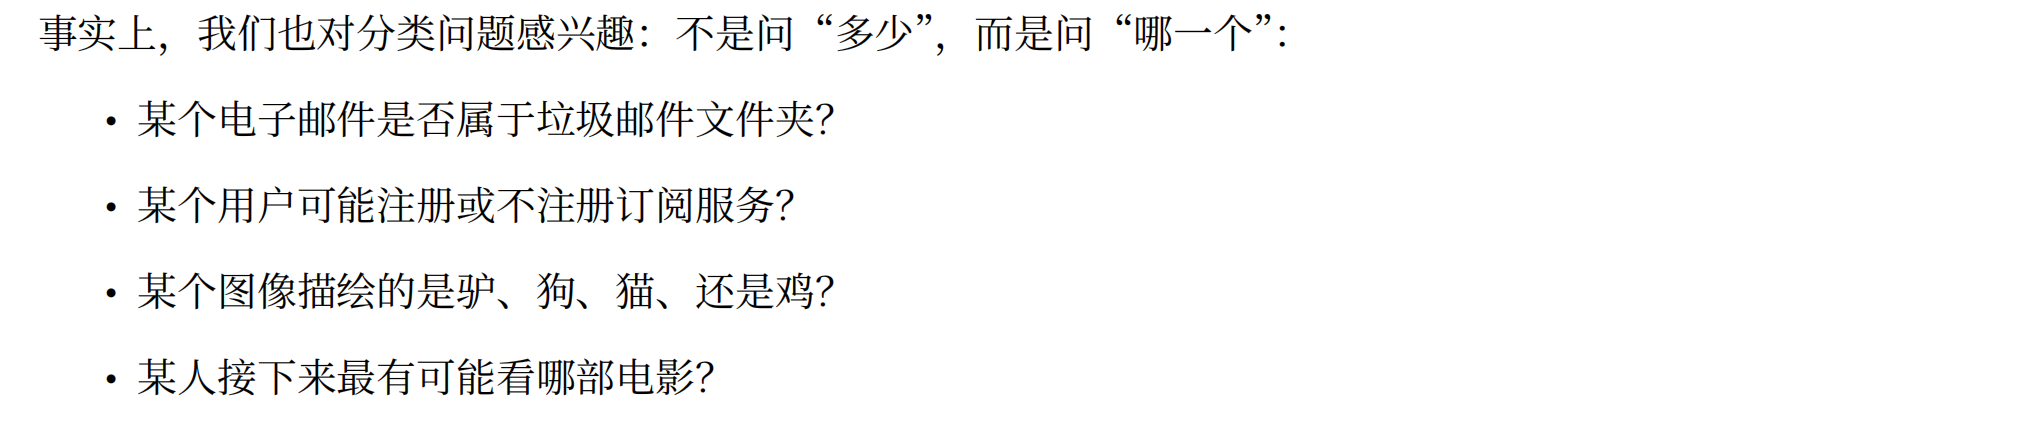

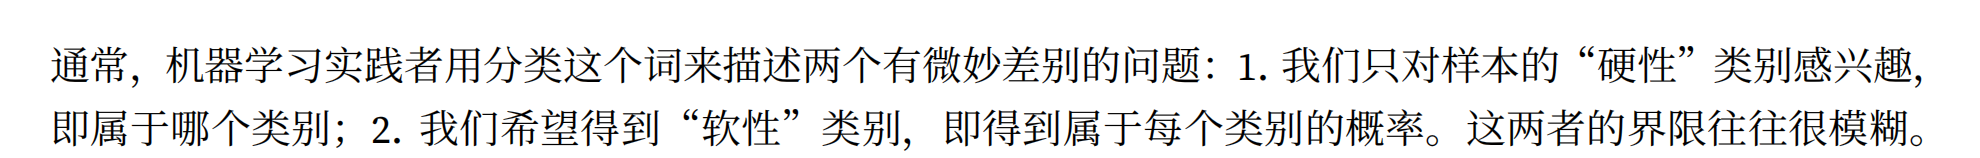

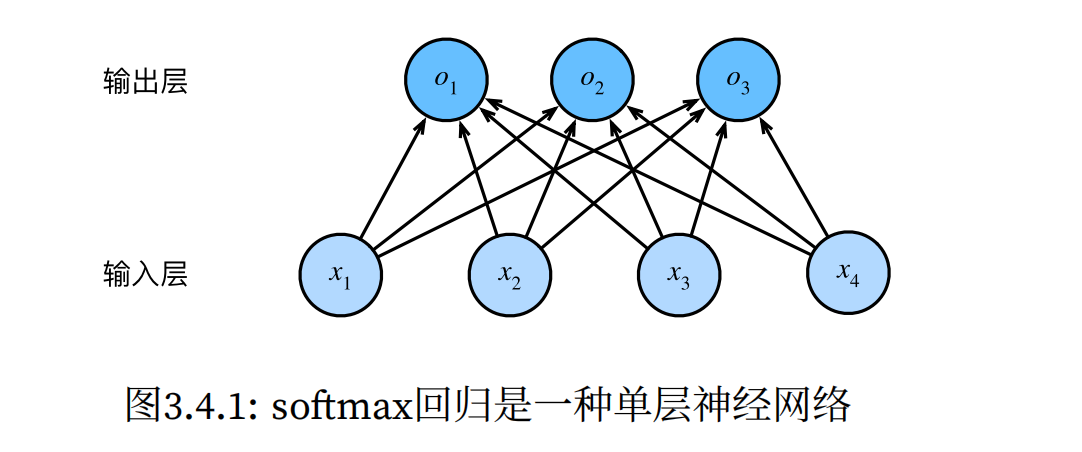

要将输出视为概率，那么我们必须保证在任何数据上的输出都是非负且总和为1.

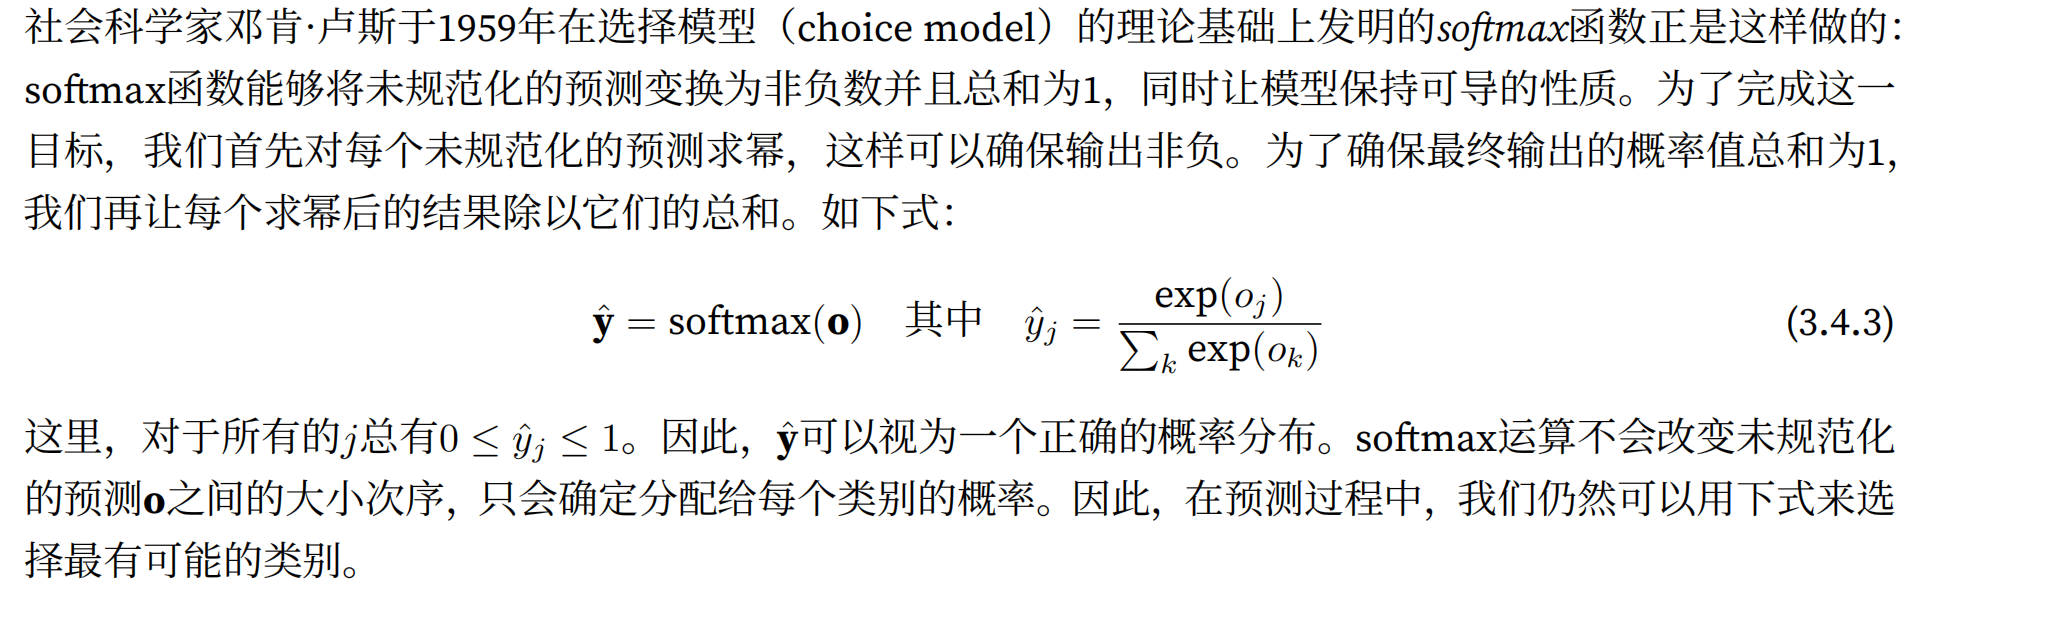

## 小批量样本的矢量化

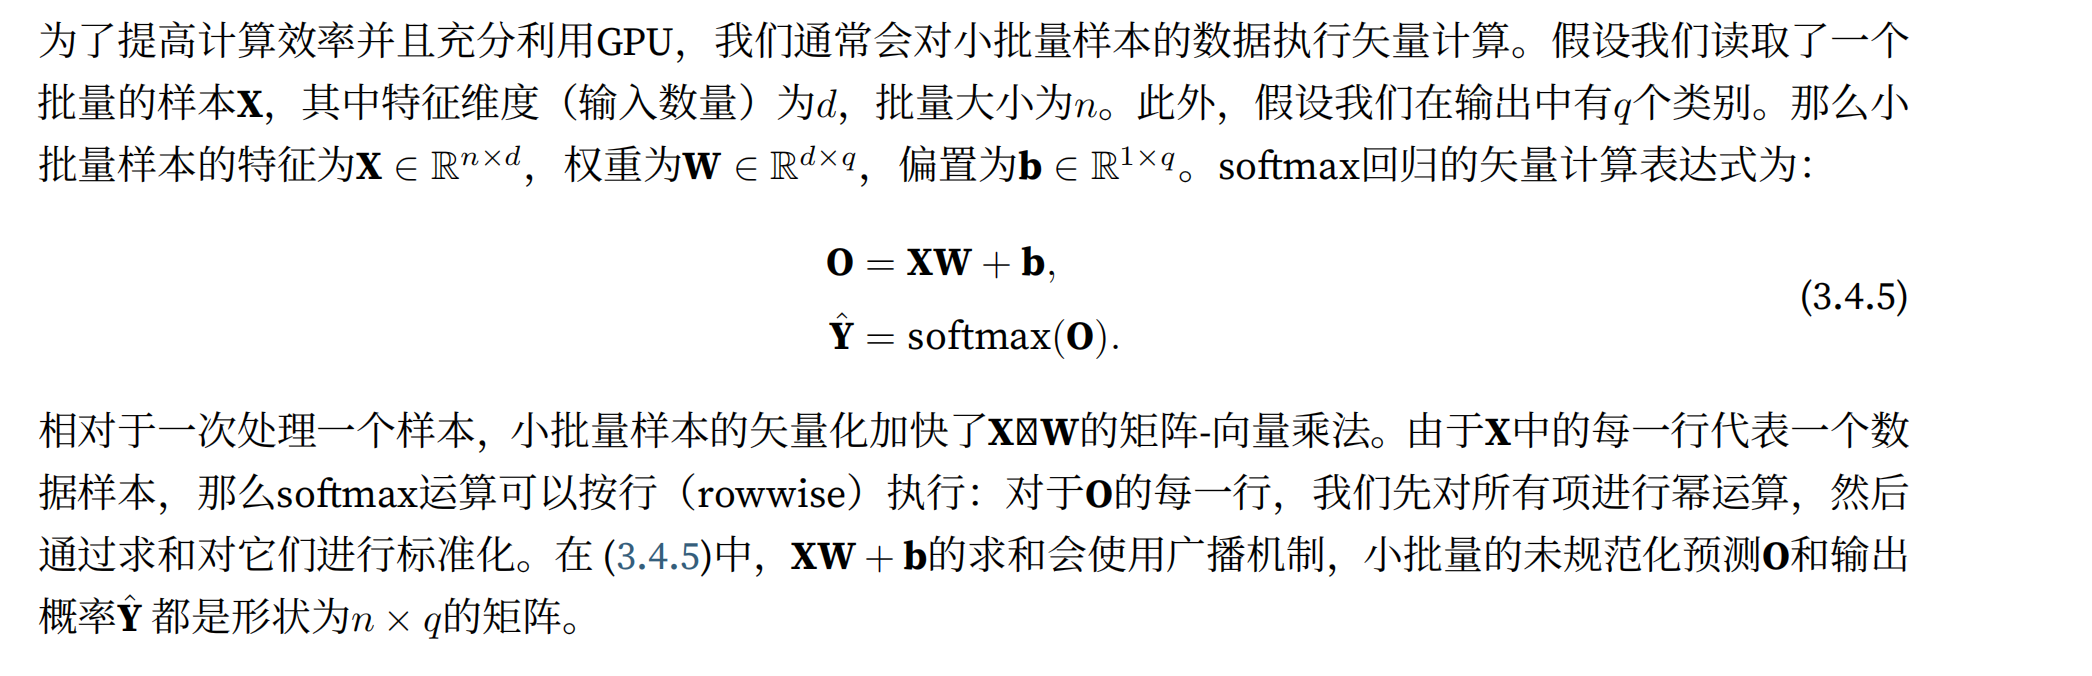

## 损失函数

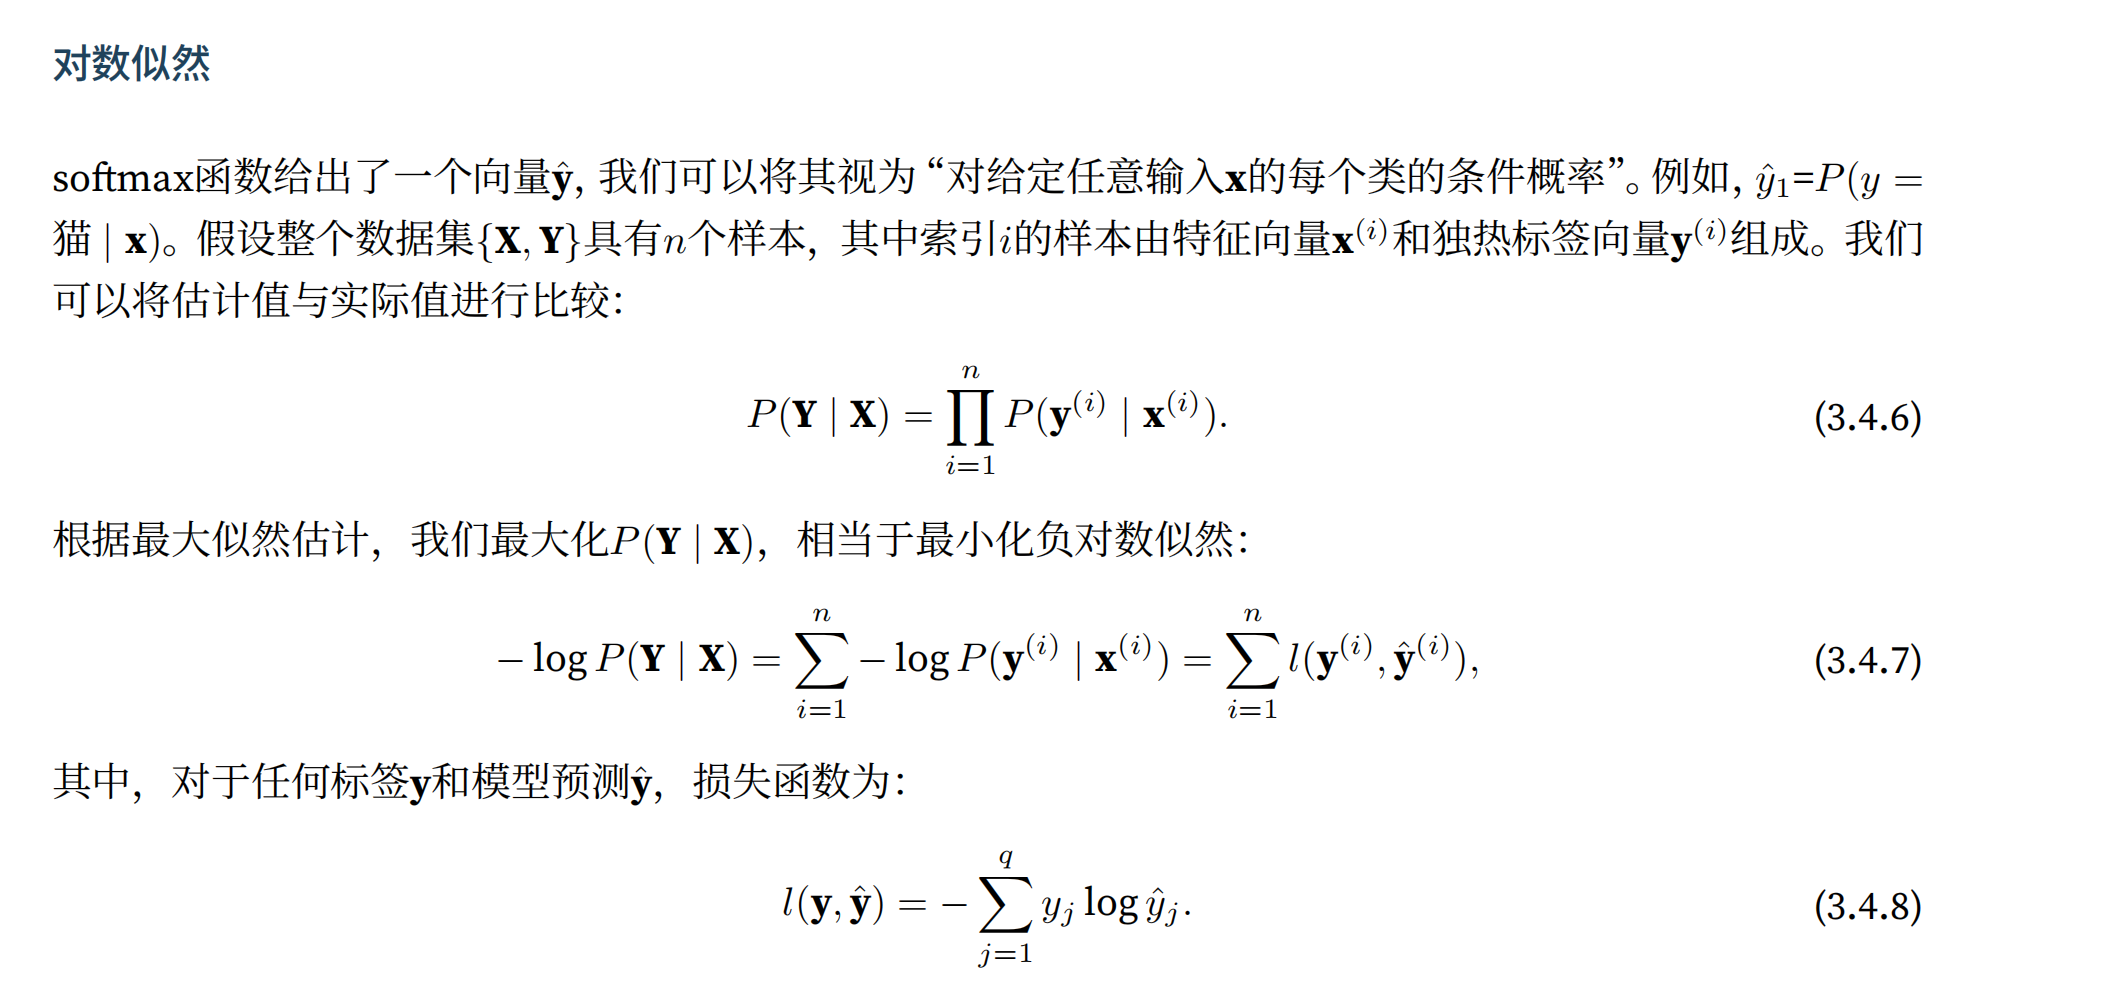

## softmax及其导数

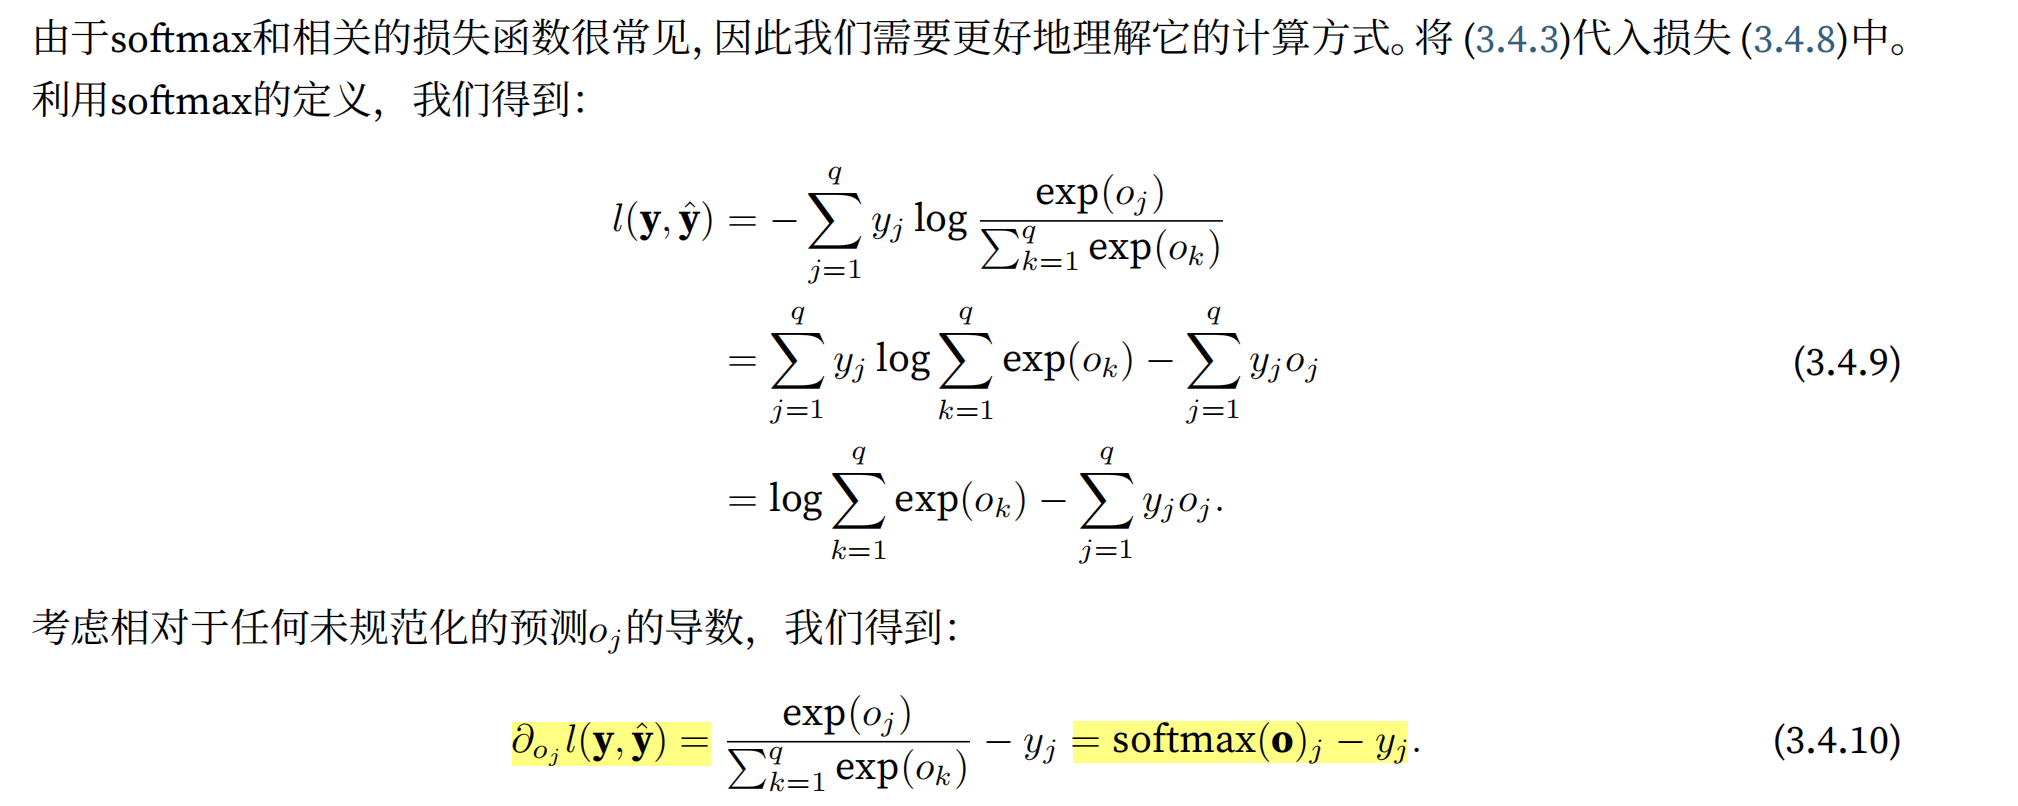

## 交叉熵损失

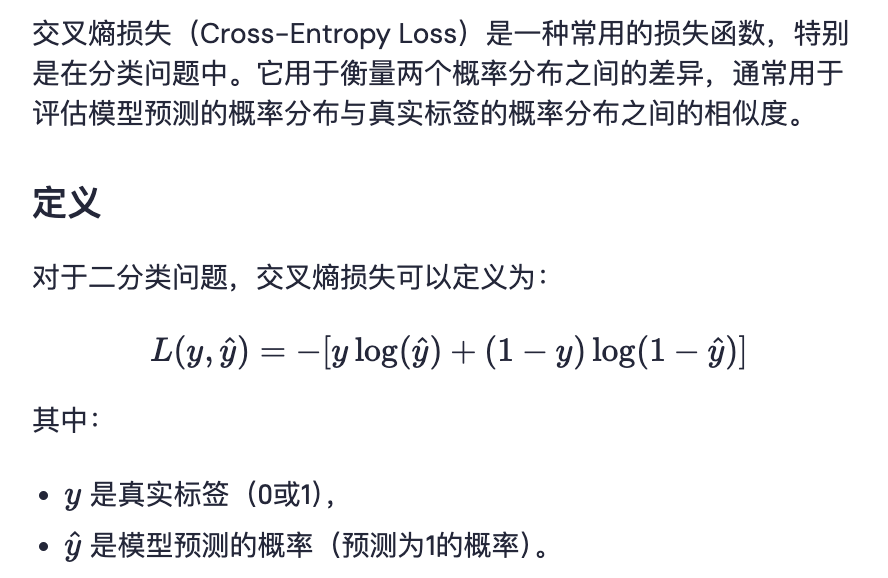

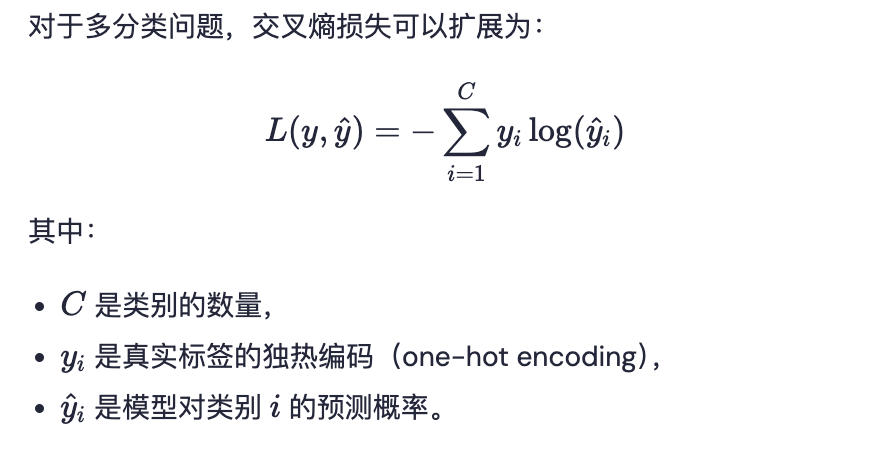

# 3.5 图像分类数据集

使用Fashion-MNIST数据集

In [5]:
%matplotlib inline

import sys
from mxnet import gluon
from d2l import mxnet as d2l

d2l.use_svg_display()

通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中

In [6]:
mnist_train = gluon.data.vision.FashionMNIST(train=True)
mnist_test = gluon.data.vision.FashionMNIST(train=False)

查看训练集和测试集的长度

In [7]:
len(mnist_train), len(mnist_test)

(60000, 10000)

查看数据的形状

In [8]:
mnist_train[0][0].shape

(28, 28, 1)

定义一个函数，在数字标签索引及其文本名称之间进行转换。

In [9]:
def get_fashion_mnist_labels(labels): #@save
    """返回Fashion-MNSIT数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pillover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

创建一个可视化样本的函数

In [18]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5): #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(img.asnumpy())
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

以下是训练数据集中前几个样本的图像及其相应的标签

(18, 28, 28, 1)


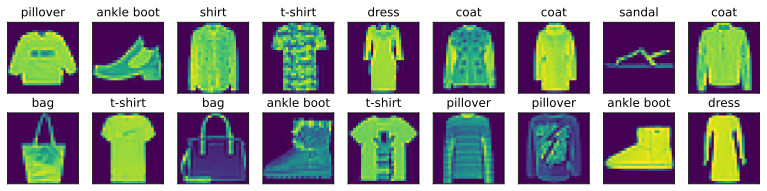

In [19]:
X, y = mnist_train[:18]

print(X.shape)

show_images(X.squeeze(axis=-1), 2, 9, titles=get_fashion_mnist_labels(y));

## 读取小批量

使用内置的数据迭代器。通过内置迭代器，我们可以随机打乱所有的样本，从而无偏见地读取小批量。


In [20]:
batch_size = 256

trainsfomer = gluon.data.vision.transforms.ToTensor()
train_iter = gluon.data.DataLoader(mnist_train.transform_first(trainsfomer),
                                   batch_size, shuffle=True)

In [21]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'2.76 sec'

## 整合所有的组件

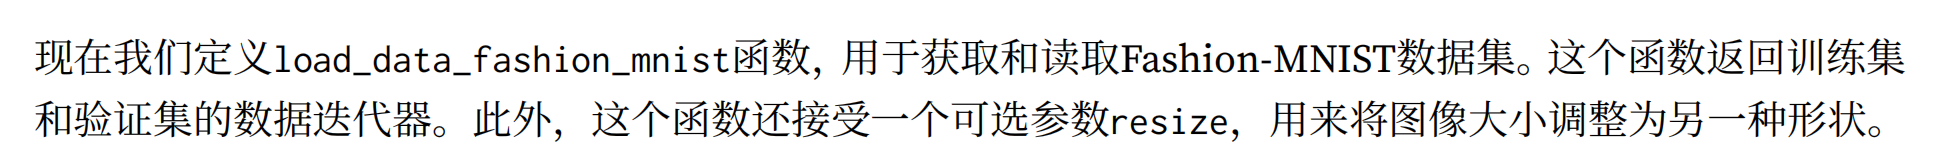

In [22]:
def load_data_fashion_mnist(batch_size, resize=None): #@save
    """下载Fashion-MNIST数据集，然后将其家在到内存中"""
    dataset = gluon.data.vision
    trans = [dataset.transforms.ToTensor()]
    if resize:
        trans.insert(0, dataset.transforms.Resize(resize))
    trans = dataset.transforms.Compose(trans)
    mnist_train = dataset.FashionMNIST(train=True).transform_first(trans)
    mnist_test = dataset.FashionMNIST(train=False).transform_first(trans)
    return (gluon.data.DataLoader(mnist_train, batch_size, shuffle=True),
            gluon.data.DataLoader(mnist_test, batch_size, shuffle=False))

通过指定resize参数来测试load_data_fashion_mnist函数的图像大小调整功能

In [23]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

(32, 1, 64, 64) <class 'numpy.float32'> (32,) <class 'numpy.int32'>
